In [ ]:
#9/20/2025
#population race 2019

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [6]:
df = pd.read_csv('pop_race_2019.csv')
print(f'shape is: {df.shape} rows, columns')

shape is: (408, 6) rows, columns


In [13]:
print('first 5 rows:')
print(df.head())

print(f'amount of missing values: {df.isnull().sum()}')


first 5 rows:
  state state_name                              race                hispanic  \
0    AL    Alabama  American Indian or Alaska Native      Hispanic or Latino   
1    AL    Alabama  American Indian or Alaska Native  Not Hispanic or Latino   
2    AL    Alabama         Asian or Pacific Islander      Hispanic or Latino   
3    AL    Alabama         Asian or Pacific Islander  Not Hispanic or Latino   
4    AL    Alabama         Black or African American      Hispanic or Latino   

   population  state_total_population  
0        7823                 4903185  
1       30433                 4903185  
2        4833                 4903185  
3       80310                 4903185  
4       17693                 4903185  
amount of missing values: state                     0
state_name                0
race                      0
hispanic                  0
population                0
state_total_population    0
dtype: int64


In [11]:
print('\ncolumn types and nulls cnt')
print(df.info())


column types and nulls cnt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   408 non-null    object
 1   state_name              408 non-null    object
 2   race                    408 non-null    object
 3   hispanic                408 non-null    object
 4   population              408 non-null    int64 
 5   state_total_population  408 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 19.3+ KB
None


In [14]:
print(f'checking for dupes: {df.duplicated().sum()}')
print(f' checking for - in population: {(df['population'] <0).any()}')


checking for dupes: 0
 checking for - in population: False


In [ ]:
print(f'number of states: {df['state'].nunique()}')
print(f'sorted sates : {df['state_name'].unique()}')


number of states: 51
sorted sates : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Race categories: (<bound method Series.unique of 0      American Indian or Alaska Native
1      American Indian or Alaska Native
2             Asian or Pacific Islander
3             Asian or Pacific Islander
4             Black or African American
                     ...               
403           Asian or Pacific Islander
404           Black or Africa

In [19]:

print(f'\nRace categories: ({df['race'].unique} ')

print(f'({df['hispanic'].unique()})')


Race categories: (<bound method Series.unique of 0      American Indian or Alaska Native
1      American Indian or Alaska Native
2             Asian or Pacific Islander
3             Asian or Pacific Islander
4             Black or African American
                     ...               
403           Asian or Pacific Islander
404           Black or African American
405           Black or African American
406                               White
407                               White
Name: race, Length: 408, dtype: object> 
(['Hispanic or Latino' 'Not Hispanic or Latino'])


In [20]:
# some stats  about the population
print(f'Total us pop in dataset:  {df['state_total_population'].sum()}')
print(f' avg state popultion:  {df['state_total_population'].mean()} ')
print(f'population by race grp: {(df.groupby('race')['population'].sum().sort_values(ascending=False))}')

Total us pop in dataset:  2379864210
 avg state popultion:  5833000.514705882 
population by race grp: race
White                               255040203
Black or African American            46599393
Asian or Pacific Islander            21814724
American Indian or Alaska Native      4785203
Name: population, dtype: int64


In [ ]:
race_total = df.groupby('race')['population'].sum().sort_values(ascending=False)
print(f'nationwide toatls by race\n: {race_total}')

hispanic_totals = df.groupby('hispanic')['population'].sum()
print(f'\nNation total by hispanic/non-hispanic:\n   {hispanic_totals}')


nationwide toatls by race
: race
White                               255040203
Black or African American            46599393
Asian or Pacific Islander            21814724
American Indian or Alaska Native      4785203
Name: population, dtype: int64

Nation total by hispanic/non-hispanic:
   hispanic
Hispanic or Latino         60572237
Not Hispanic or Latino    267667286
Name: population, dtype: int64


In [29]:
race_per_st = (
df.groupby(['state_name', 'race'])['population'].sum().groupby(level=0).apply(lambda x: 100 * x / x.sum()))

print(f'Break down of race percentage via state\n:  {race_per_st}  ')

Break down of race percentage via state
:  state_name  state_name  race                            
Alabama     Alabama     American Indian or Alaska Native     0.780228
                        Asian or Pacific Islander            1.736484
                        Black or African American           27.376205
                        White                               70.107083
Alaska      Alaska      American Indian or Alaska Native    17.532893
                                                              ...    
Wisconsin   Wisconsin   White                               88.053484
Wyoming     Wyoming     American Indian or Alaska Native     3.006778
                        Asian or Pacific Islander            1.375702
                        Black or African American            1.768785
                        White                               93.848735
Name: population, Length: 204, dtype: float64  


C:\Users\oosode.Oos\AppData\Local\Temp\ipykernel_20416\197529294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_totals.index, y=race_totals.values, palette='dark')


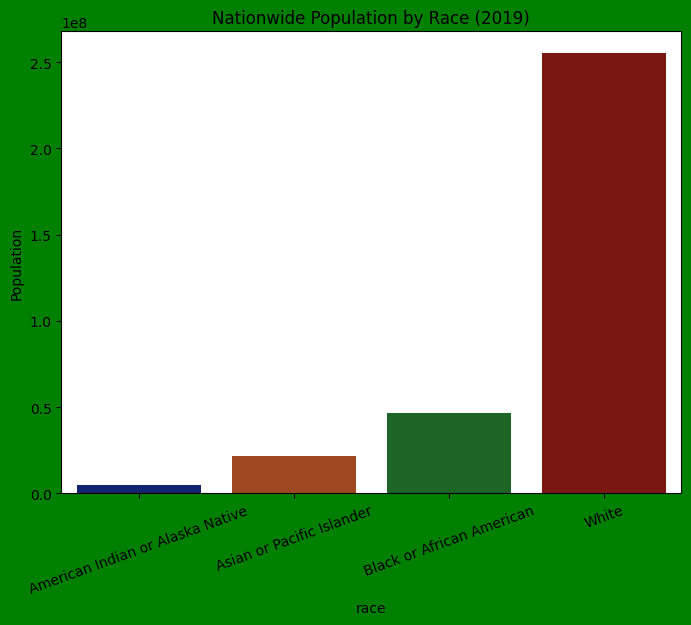

In [49]:
plt.figure(figsize=(8,6), facecolor='green')
color = ['orange', 'yellow','black','white']
sns.barplot(x=race_totals.index, y=race_totals.values, palette='dark')
plt.title('Nationwide Population by Race (2019)')
plt.ylabel('Population')
plt.xticks(rotation=20)
plt.show()


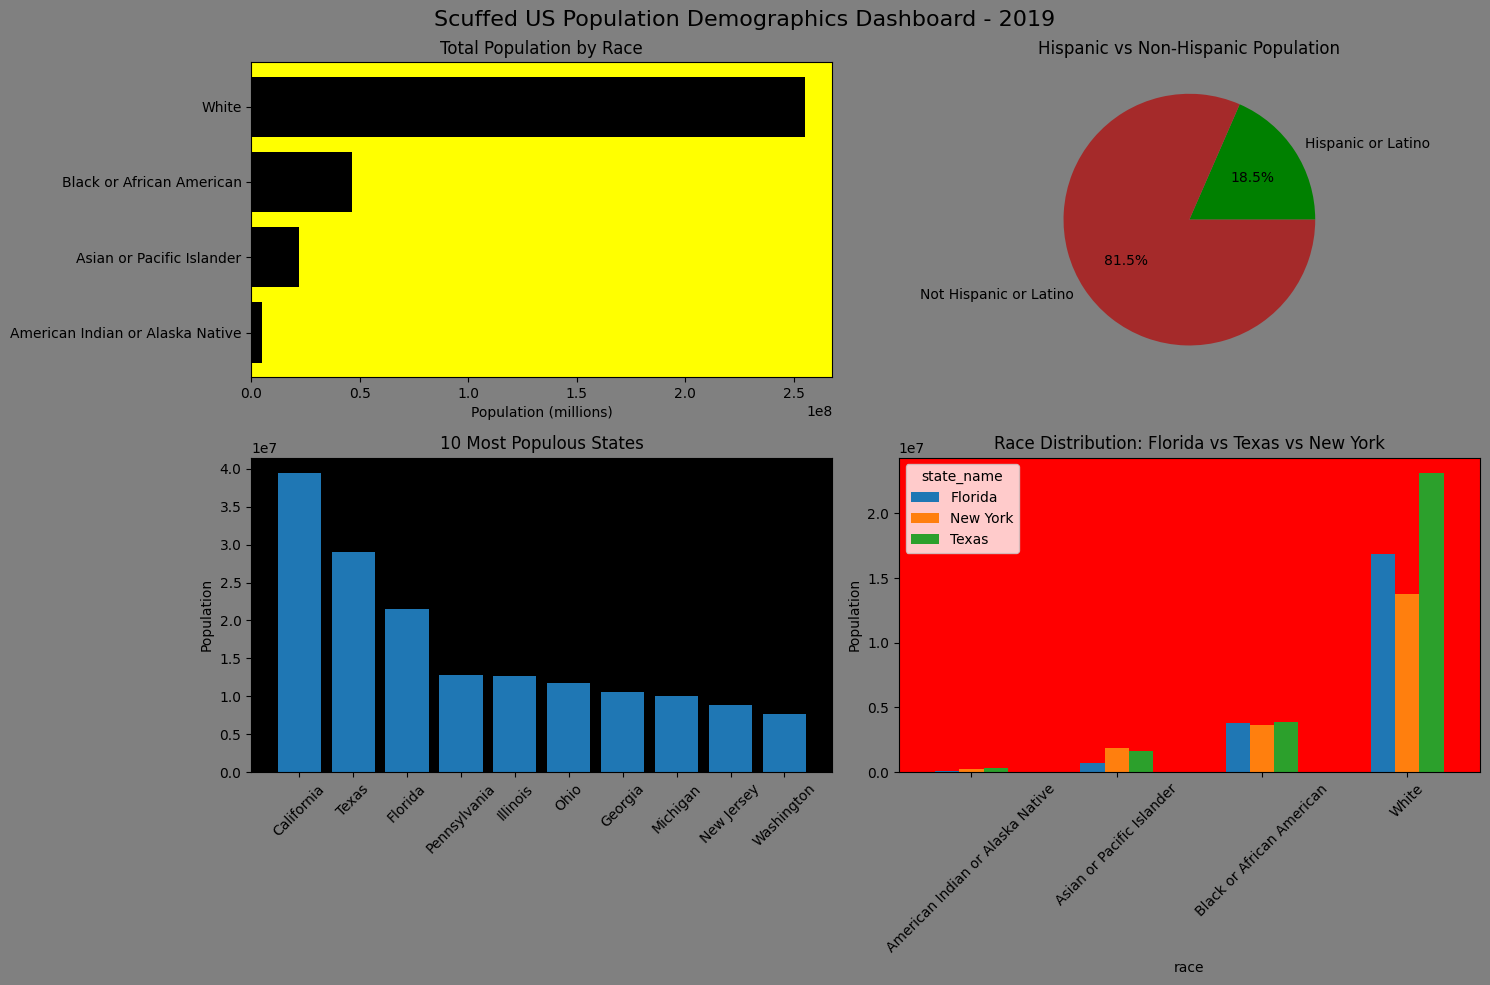

In [70]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.patch.set_facecolor('gray')
fig.suptitle('Scuffed US Population Demographics Dashboard - 2019', fontsize=16)

race_totals = df.groupby('race')['population'].sum().sort_values(ascending=True)
axes[0,0].barh(race_totals.index, race_totals.values, color='black')
axes[0,0].set_title('Total Population by Race')
axes[0,0].set_xlabel('Population (millions)')
axes[0,0].set_facecolor('yellow')


hispanic_totals = df.groupby('hispanic')['population'].sum()
colors = ['green',  'brown']
axes[0,1].pie(hispanic_totals.values, labels=hispanic_totals.index, autopct='%1.1f%%', colors=colors)
axes[0,1].set_title('Hispanic vs Non-Hispanic Population')
axes[0,1].set_facecolor('black')


state_totals = df.groupby('state_name')['state_total_population'].first().sort_values(ascending=False).head(10)
axes[1,0].bar(range(len(state_totals)), state_totals.values)
axes[1,0].set_xticks(range(len(state_totals)))
axes[1,0].set_xticklabels(state_totals.index, rotation=45)
axes[1,0].set_title('10 Most Populous States')
axes[1,0].set_ylabel('Population')
axes[1,0].set_facecolor('black')


ca_tx_data = df[df['state_name'].isin(['Florida', 'Texas', 'New York'])]
race_by_state = ca_tx_data.pivot_table(values='population', index='race', columns='state_name', aggfunc='sum')
race_by_state.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Race Distribution: Florida vs Texas vs New York')
axes[1,1].set_ylabel('Population')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_facecolor('red')

plt.tight_layout()
plt.show()

2025-09-20 23:07:03.331 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 23:07:03.545 
  command:

    streamlit run c:\Users\oosode.Oos\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-20 23:07:03.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 23:07:03.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 23:07:03.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 23:07:03.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 23:07:03.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-20 2

DeltaGenerator()

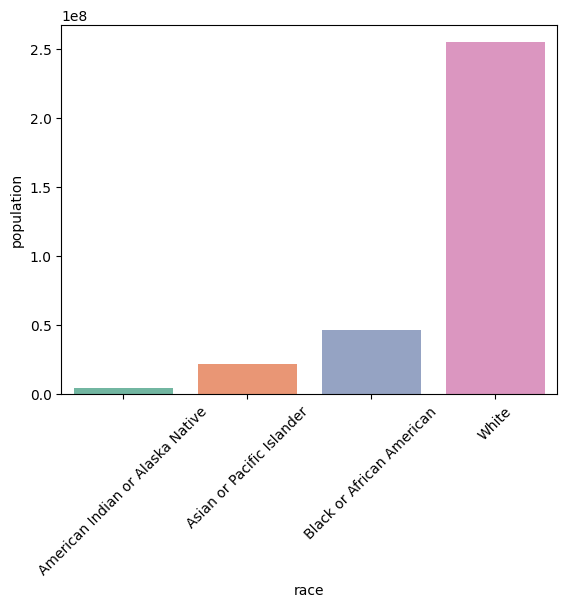

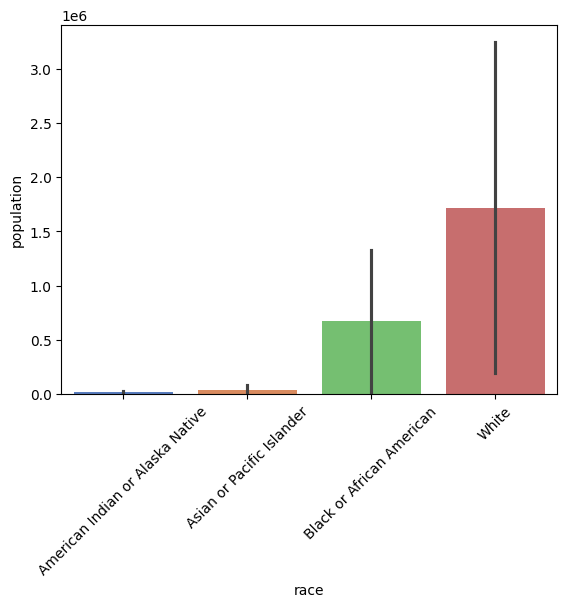

In [ ]:


st.title("US Population by Race (2019) Dashboard")-
st.subheader("Dataset Preview")
st.write(df.head())


st.subheader("Total Population by Race")
race_totals = df.groupby("race")["population"].sum().reset_index()

fig, ax = plt.subplots()
sns.barplot(x="race", y="population", data=race_totals, palette="Set2", ax=ax)
plt.xticks(rotation=45)
st.pyplot(fig)

st.subheader("Population by Race in a Specific State")
state_choice = st.selectbox("Choose a state:", df["state_name"].unique())

state_data = df[df["state_name"] == state_choice]
fig2, ax2 = plt.subplots()
sns.barplot(x="race", y="population", data=state_data, palette="muted", ax=ax2)
plt.xticks(rotation=45)
st.pyplot(fig2)